<a href="https://colab.research.google.com/github/jackiekuen2/notes-handson-ml-tf/blob/master/ch3_MNIST_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_mldata, fetch_openml
import numpy as np

# 0: Get data

In [0]:
# mnist = fetch_mldata('MNIST original')
mnist = fetch_openml('mnist_784', version=1)
# mnist

In [0]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [0]:
X, y = mnist['data'], mnist['target']

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [0]:
# Change data type of y: string to integers
y = y.astype(np.uint8)

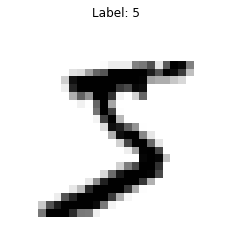

In [0]:
# Display hand-written digits
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

some_digit_label = y[0]

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.title('Label: %s' % some_digit_label)
plt.show()

# 1: Split into training set and test set + Shuffling
- This data set is already shuffled

In [0]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [0]:
# import numpy as np

# Shuffling
# np.random.seed(42)
# shuffle_index = np.random.permutation(60000)

# X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# 2A: Binary Classifier (SGD Classifier)
e.g. Number 5

In [0]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [0]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, verbose=0)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
sgd_clf.predict([some_digit])

array([ True])

# 3: Performance Measures

### 3A: Accuracy: Cross-Validation: Stratified Sampling, a representative ratio of each class

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import  clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("Accuracy: ", n_correct/len(y_pred))

Accuracy:  0.95035
Accuracy:  0.96035
Accuracy:  0.9604


In [0]:
# Cross-check with cross_val_score()
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

## 3B: Confusion Matrix

![confusion_matrix](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg)

In [0]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [0]:
from sklearn.metrics import precision_score, recall_score
# Precision score
print(precision_score(y_train_5, y_train_pred))

# Recall score
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


In [0]:
from sklearn.metrics import f1_score

# F1 score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

## 3C: Decision Scores, Precision/Recall Tradeoff
- precision_recall_curve(y_true, decision_scores) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

In [0]:
# some_digit label = 5
some_digit_score = sgd_clf.decision_function([some_digit])
print("Decision score: ", some_digit_score)

# Prediction of default threshold: 0.5
print("Prediction of default threshold (Is 5?): ", sgd_clf.predict([some_digit]))

# Prediction of custom threshold: e.g. 20000
threshold = 20000
y_some_digit_pred = (some_digit_score > threshold)
print("Prediction of custom threshold (Is 5?): ", y_some_digit_pred)

Decision score:  [2164.22030239]
Prediction of default threshold (Is 5?):  [ True]
Prediction of custom threshold (Is 5?):  [False]


In [0]:
sgd_clf.predict([some_digit])

array([ True])

In [0]:
# Retrieving all decision scores
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, 
                             method='decision_function')

In [0]:
# Print out first 10 predictions and their decision scores
print(y_train_pred[:10])
print(y_scores[:10])

[ True False False False False False False False False False]
[  1200.93051237 -26883.79202424 -33072.03475406 -15919.5480689
 -20003.53970191 -16652.87731528 -14276.86944263 -23328.13728948
  -5172.79611432 -13873.5025381 ]


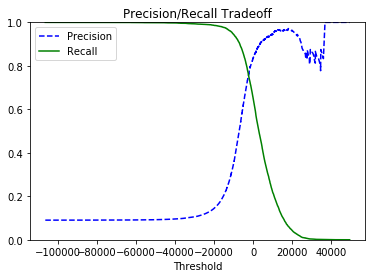

In [0]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.title("Precision/Recall Tradeoff")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

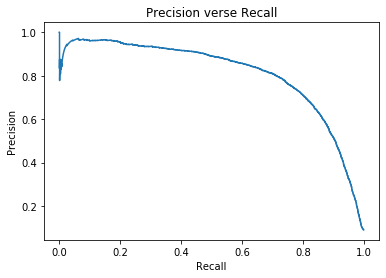

In [0]:
plt.plot(recalls[:-1], precisions[:-1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision verse Recall')
plt.show()

In [0]:
# 90% precision, set the threshold to about 5000
y_train_pred_90 = (y_scores > 5000)

# New Precision score
print("Prceision score: ", precision_score(y_train_5, y_train_pred_90))
print("Recall score: ", recall_score(y_train_5, y_train_pred_90))

Prceision score:  0.9160050146259925
Recall score:  0.40435344032466336


## 3D: ROC Curve, AUC
- True Positibe Rate vs. False Positive Rate
- Sensitivity (Recall) vs. 1 - Specificity
- Good classifier has AUC ~1.0, while random classifier has AUC ~0.5

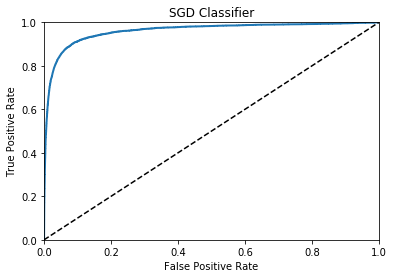

In [0]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("SGD Classifier")

plot_roc_curve(fpr, tpr, "SGD Classifier")
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

# 2B: Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


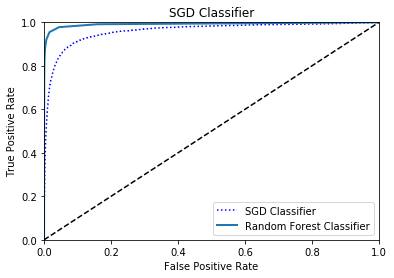

In [0]:
# Decision score = Probability of positive class
y_scores_forest = y_probas_forest[:, 1]

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD Classifier") # Also plot the SGD classifier
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest Classifier")
plt.legend(loc="lower right")
plt.show()

In [0]:
# ROC AUC score of Random Classifier
print("ROC AUC score: ", roc_auc_score(y_train_5, y_scores_forest))

ROC AUC score:  0.9920527492698306


In [0]:
# Get all predictions
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
# Precision score and Recall score of Random Classifier
print("Precision score: ", precision_score(y_train_5, y_train_pred_forest))
print("Recall score: ", recall_score(y_train_5, y_train_pred_forest))

Precision score:  0.986046511627907
Recall score:  0.8212506917542889
